# 1. Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define project folder path
path = r'C:\Users\nsmith\OneDrive - Georgia Poultry Laboratory Network\CareerFoundry\02 - Data Immersion\Achievement 4\12-2024 Instacart Basket Analysis'

In [3]:
# import project data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_derived_grouped.pkl'))

   # 2. Inspect data

In [4]:
# view first 10 rows
ords_prods_merge.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
5,3367565,1,6,2,7,19.0,False,196,1,1,...,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
6,550135,1,7,1,9,20.0,False,196,1,1,...,Mid-range product,Regularly busy,Busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
7,3108588,1,8,1,14,14.0,False,196,2,1,...,Mid-range product,Regularly busy,Busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
8,2295261,1,9,1,16,0.0,False,196,4,1,...,Mid-range product,Regularly busy,Busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
9,2550362,1,10,4,8,30.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [5]:
# describe dataset
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [6]:
# view the mean
ords_prods_merge['prices'].mean()

7.790994092173371

In [7]:
# view the median
ords_prods_merge['prices'].median()

7.4

In [8]:
# view the max
ords_prods_merge['prices'].max()

25.0

# 3. Sampling Data

#### Split the data into a 70/30 ratio using random numbers

In [21]:
# Assign the seed value to ensure reproducibility
np.random.seed(4)

In [22]:
# store boolean values representing above/below 0.7 to new list the same length as dataframe
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
# split data frame into two samples; big where dev = true
big = ords_prods_merge[dev]

In [23]:
# split data frame into two samples; small where dev = false
small = ords_prods_merge[~dev]

#### Check length of samples against dataframe length

In [25]:
# check length of original dataframe
len(ords_prods_merge)

32404859

In [26]:
# add length of two samples
len(big) + len(small)

32404859

#### Filter to only necessary columns to improve processing speed

In [27]:
# create new df from small sample with only dow and price columns
df_2 = small[['order_day_of_week', 'prices']]

# 4. Create visualizations

## Bar chart

<Axes: >

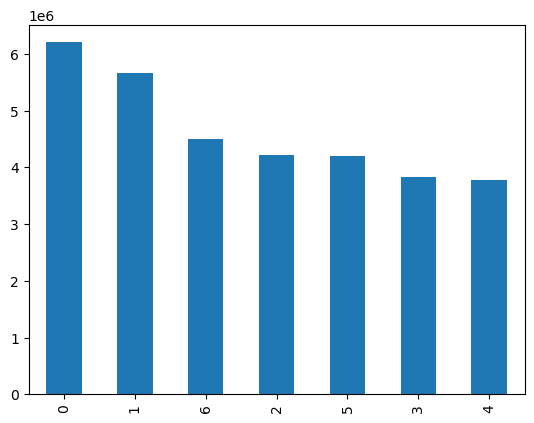

In [10]:
# create a bar chart
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

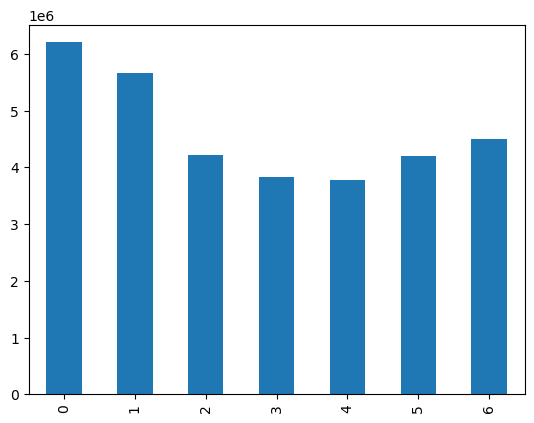

In [11]:
# create a bar chart, but sort on the column index
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

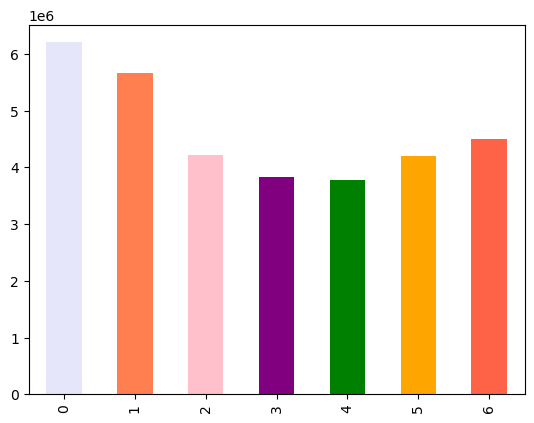

In [12]:
# create a bar chart, but sort on the column index and make it colorful!
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['lavender', 'coral', 'pink', 'purple', 'green', 'orange', 'tomato'])

## Histograms

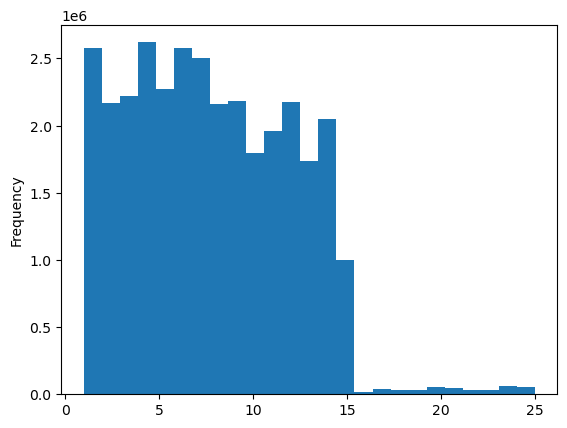

In [17]:
# create a histogram of prices column
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

## Scatterplots

<Axes: xlabel='prices', ylabel='prices'>

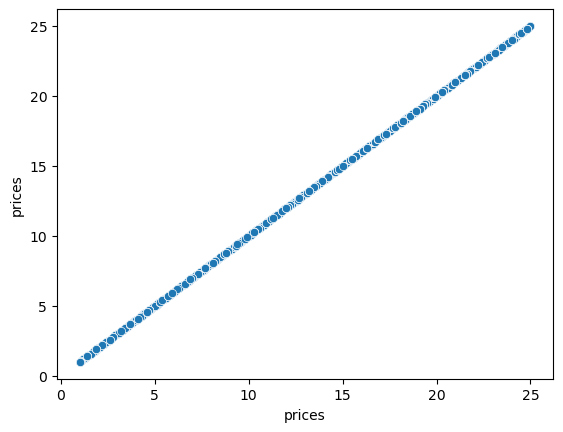

In [14]:
# create a scatterplot of the prices to identify outliers using seaborn
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

## Line charts

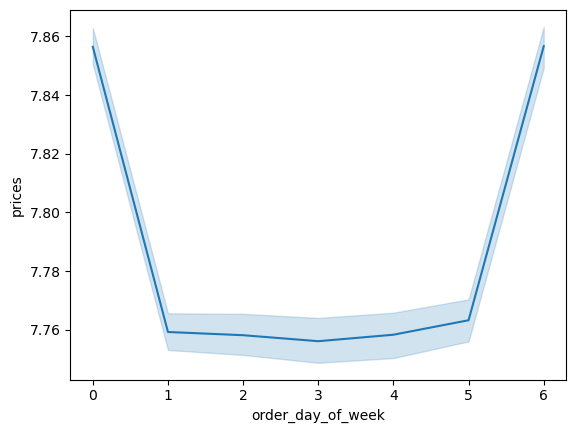

In [29]:
# create line chart from filtered sample
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

# 5. Export visualizations

In [15]:
# export bar chart to png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [18]:
# export histogram to png
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))